#### Análise de dados
Grupo: Leticia Coêlho e Lídia Alves

Para essa análise, foi considerada os seguintes filtros para criar o arquivo de excel:

|  | |  |
| ------------- | ------------- | ------------- |
| ![analysis-filter-1.png](../img/analysis-filter-1.png)  | ![analysis-filter-2.png](../img/analysis-filter-1.png)  | ![analysis-filter-3.png](../img/analysis-filter-1.png) |

##### Importando bibliotecas

In [ ]:
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Lendo e limpando o excel

In [13]:
df = pd.read_excel('output-analysis.xlsx')
df.head()

,Link,Total Price,Rental Price,Features,Description,Region,Subway Near,Furnished,Pet Friendly,Floor,Parking Space,Bathrooms,Rooms,Area
0,https://www.quintoandar.com.br/imovel/89430462...,R$ 1.905 total,R$ 1.790 aluguel,120 m² · 3 quartos · 1 vaga,"Aluguel de casa, de 120 m² com 3 quartos, 1 ba...","Rua Carapiranga, Vila Caraguata · São Paulo",Não próx.,Sem mobília,Aceita pet,Até 3° andar,1 vaga,1 banheiro,3 quartos,120 m²
1,https://www.quintoandar.com.br/imovel/89416302...,R$ 1.451 total,R$ 1.365 aluguel,80 m² · 3 quartos,Casa de 3 quartos para alugar.,"Rua Doutor José Mário Teixeira de Leão, Jardim...",Não próx.,Sem mobília,Não aceita,-,-,2 banheiros,3 quartos,80 m²
2,https://www.quintoandar.com.br/imovel/89492901...,R$ 1.876 total,R$ 1.800 aluguel,120 m² · 3 quartos,Casa de 3 quartos para alugar.,"Rua Condessa Amália Matarazzo, Jardim Peri · S...",Não próx.,Sem mobília,Não aceita,-,-,2 banheiros,3 quartos,120 m²
3,https://www.quintoandar.com.br/imovel/89303758...,R$ 1.634 total,R$ 1.300 aluguel,120 m² · 3 quartos,Apartamento para alugar em Chácara Califórnia ...,"Rua Comendador Gil Pinheiro, Chácara Califórni...",Metrô próx.,Sem mobília,Aceita pet,Até 3° andar,-,1 banheiro,3 quartos,120 m²
4,https://www.quintoandar.com.br/imovel/89492798...,R$ 1.962 total,R$ 1.890 aluguel,90 m² · 2 quartos,Apartamento de 2 quartos para alugar.,"Rua Diogo Cabrera, Imirim · São Paulo",Não próx.,Sem mobília,Aceita pet,Até 3° andar,-,1 banheiro,2 quartos,90 m²


In [21]:
# Limpeza

df['Total Price (R$)'] = (
    df['Total Price']
    .str.replace(r'R\$\s?', '', regex=True)         
    .str.replace(r'total', '', regex=True)        
    .str.replace(r'\.', '', regex=True)           
    .str.replace(r',', '.', regex=True)           
    .str.strip()
    .astype(float)
)

df['Rental Price (R$)'] = (
    df['Rental Price']
    .str.replace(r'R\$\s?', '', regex=True)        
    .str.replace(r'aluguel', '', regex=True)       
    .str.replace(r'\.', '', regex=True)            
    .str.replace(r',', '.', regex=True)            
    .str.strip()
    .astype(float)
)

df['Area (m²)'] = df['Area'].str.replace('m²', '', regex=False).str.strip().astype(float)
df['R$/m²'] = df['Total Price (R$)'] / df['Area (m²)']
df['Bairro'] = df['Region'].str.extract(r',\s*(.*?)\s*·')

df[['Total Price (R$)', 'Rental Price (R$)', 'Area (m²)', 'R$/m²', 'Bairro']].head()

,Total Price (R$),Rental Price (R$),Area (m²),R$/m²,Bairro
0,1905.0,1790.0,120.0,15.875000,Vila Caraguata
1,1451.0,1365.0,80.0,18.137500,Jardim Peri
2,1876.0,1800.0,120.0,15.633333,Jardim Peri
3,1634.0,1300.0,120.0,13.616667,Chácara Califórnia
4,1962.0,1890.0,90.0,21.800000,Imirim


##### Gráficos

In [15]:
df[['Total Price (R$)', 'Rental Price (R$)', 'Area (m²)', 'R$/m²']].describe()

,Total Price (R$),Rental Price (R$),Area (m²),R$/m²
count,85.000000,85.000000,85.000000,85.000000
mean,1788.188235,1601.929412,93.223529,19.483434
std,202.643746,227.292595,12.029108,3.242591
min,1080.000000,1000.000000,80.000000,9.341667
25%,1673.000000,1436.000000,82.000000,17.380000
50%,1864.000000,1650.000000,90.000000,19.680000
75%,1940.000000,1790.000000,100.000000,21.800000
max,1997.000000,1900.000000,120.000000,24.912500


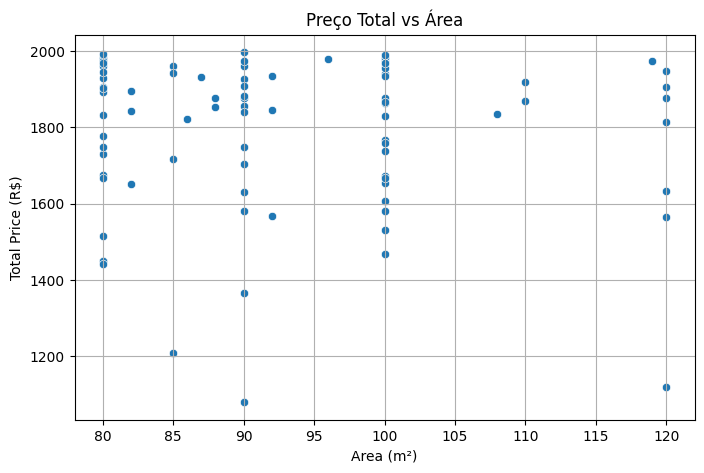

In [29]:
# Gráfico de dispersão considerando preço total e área

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Area (m²)', y='Total Price (R$)')
plt.title('Preço Total vs Área')
plt.grid(True)
plt.show()

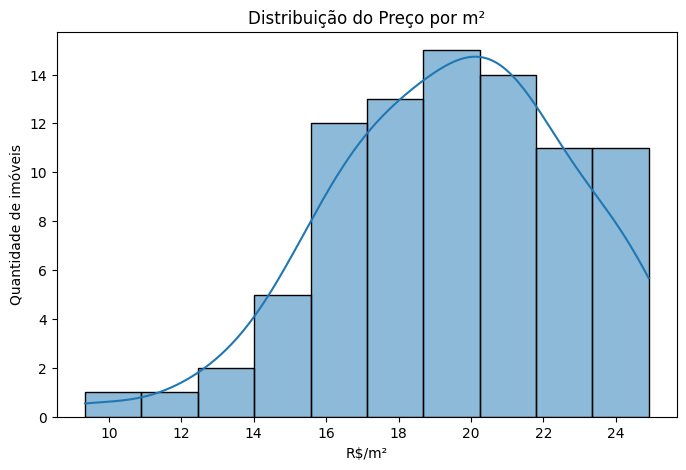

In [30]:
# Distribuição do preço por metro quadrado
plt.figure(figsize=(8,5))
sns.histplot(df['R$/m²'], kde=True, bins=10)
plt.title('Distribuição do Preço por m²')
plt.xlabel('R$/m²')
plt.ylabel('Quantidade de imóveis')
plt.show()

In [31]:
# Imóveis que aceitam pet
df['Pet Friendly'].value_counts()

Pet Friendly
Aceita pet    53
Não aceita    32
Name: count, dtype: int64

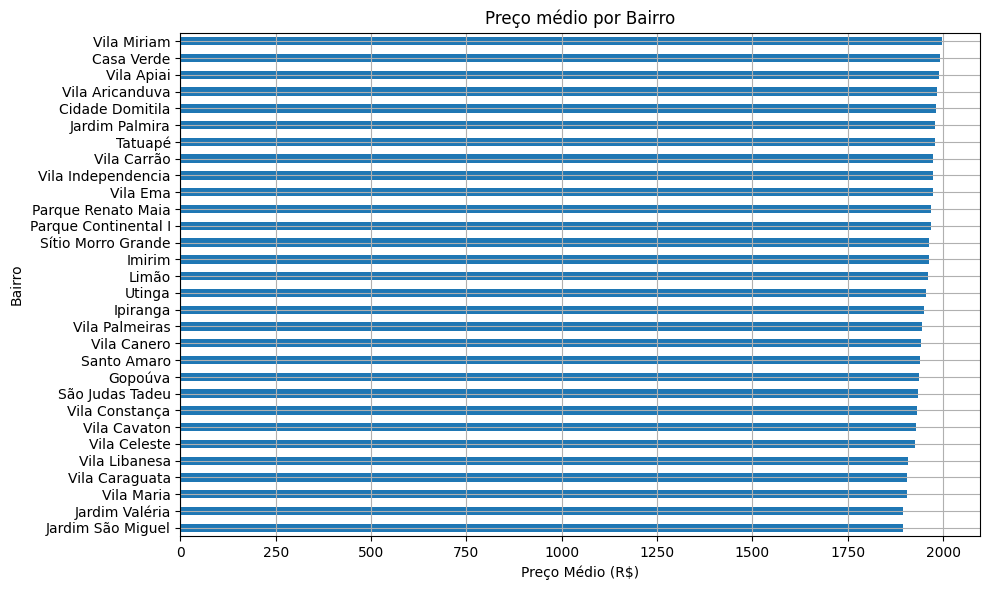

In [ ]:
# Comparação por bairros, considerando os 30 bairros mais caros
bairro_price = df.groupby('Bairro')['Total Price (R$)'].mean().sort_values()
plt.figure(figsize=(10,6))
bairro_price.plot(kind='barh')
bairro_price.tail(30).plot(kind='barh')
plt.title('Preço médio por Bairro')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Bairro')
plt.grid(True)
plt.tight_layout()
plt.show()

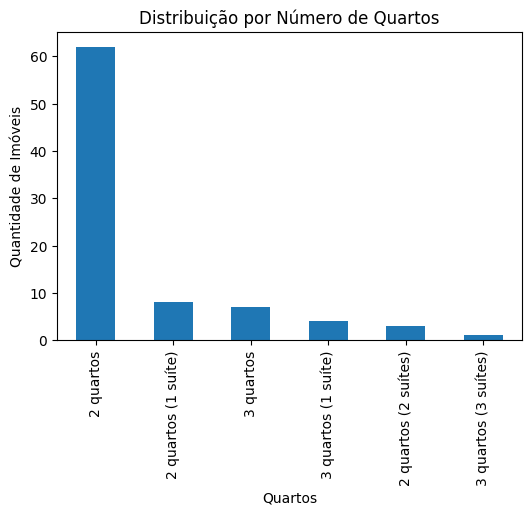

In [32]:
# Número de imóveis por quantidade de quartos
plt.figure(figsize=(6,4))
df['Rooms'].value_counts().plot(kind='bar')
plt.title('Distribuição por Número de Quartos')
plt.xlabel('Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.show()

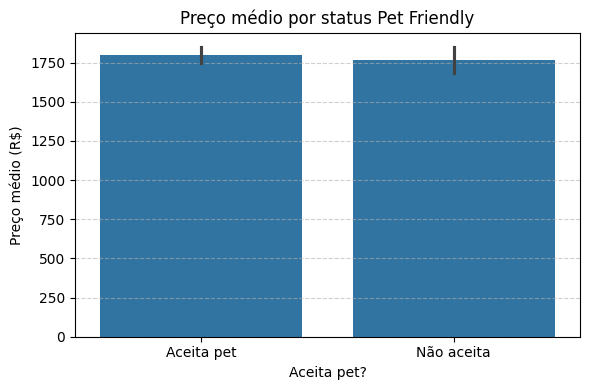

In [ ]:
# Se aceitar pets influencia muito no valor
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pet Friendly', y='Total Price (R$)', estimator='mean')
plt.title('Preço médio por aceitar animais')
plt.xlabel('Aceita pet?')
plt.ylabel('Preço médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()